# determine footprint of SV3

In this notebook, I'll calculate the footprint of SV3 BGS with all the veto masks

In [1]:
import os
import fitsio
import numpy as np 
from astropy.table import Table

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False


Bad key text.latex.preview in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95 

In [3]:
# BGS galaxies
ff = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_ANY_full.dat.fits')

In [4]:
# full randoms that encompass the tiles
ran = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/alltilesnofa.fits')

In [5]:
# random + tiles + veto mask
ran0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_ANY_0_full.ran.fits')

(-2.0, 2.0)

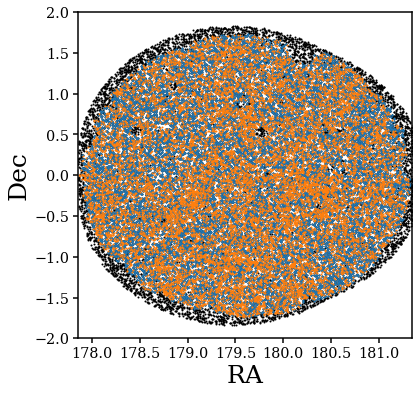

In [8]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(ran['RA'], ran['DEC'], s=1, c='k')
sub.scatter(ran0['RA'], ran0['DEC'], s=1)
sub.scatter(ff['RA'], ff['DEC'], s=1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(177.85, 181.35)
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim(-2, 2)

# 1. full footprint of random
Each of the 18 random catalog is generated to have uniform object density of 2500/deg2. 

$$A = N_{\rm ran} / 18. / (2500 {\rm deg}^{-2})$$

In [10]:
Nran = 0
for i in range(18): 
    ran = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random%i/alltilesnofa.fits' % i)
    Nran += len(ran)

footprint_full_random = float(Nran)/18./2500.
print('%.3f deg2' % (float(Nran)/18./2500.))

207.452 deg2


# 2. calculate footprint of randoms 

In [11]:
Nran_veto = 0
for i in range(18): 
    ran0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_ANY_%i_full.ran.fits' % i)
    Nran_veto += len(ran0)
print('%.3f deg2' % (footprint_full_random * float(Nran_veto)/float(Nran)))

173.641 deg2
